# **Abstract**
Modern deep learning approaches have shown promising results in meteorological applications like  nowcasting, disaster prediction, weather anomalies and several others. In order to successfully train and validate these complex algorithms, large and multi-modal datasets containing high-resolution imagery are required. Petabytes of weather data, such as from the Geostationary Environmental Satellite System (GOES) and the Next-Generation Radar (NEXRAD) system, are available to the public; however, the size and complexity of these datasets is an issue to develop and training deep models. To help address this problem, we introduce the Storm EVent ImagRy (SEVIR) dataset - a single, rich dataset that combines spatially and temporally aligned data from multiple sensors, along with baseline implementations of deep learning models and evaluation metrics, to accelerate new algorithmic innovations.


The notebook here is a walkthrough of the following:

Downloading SEVIR files
Accessing SEVIR Data
Visualizing SEVIR Data
Georeferencing SEVIR Events

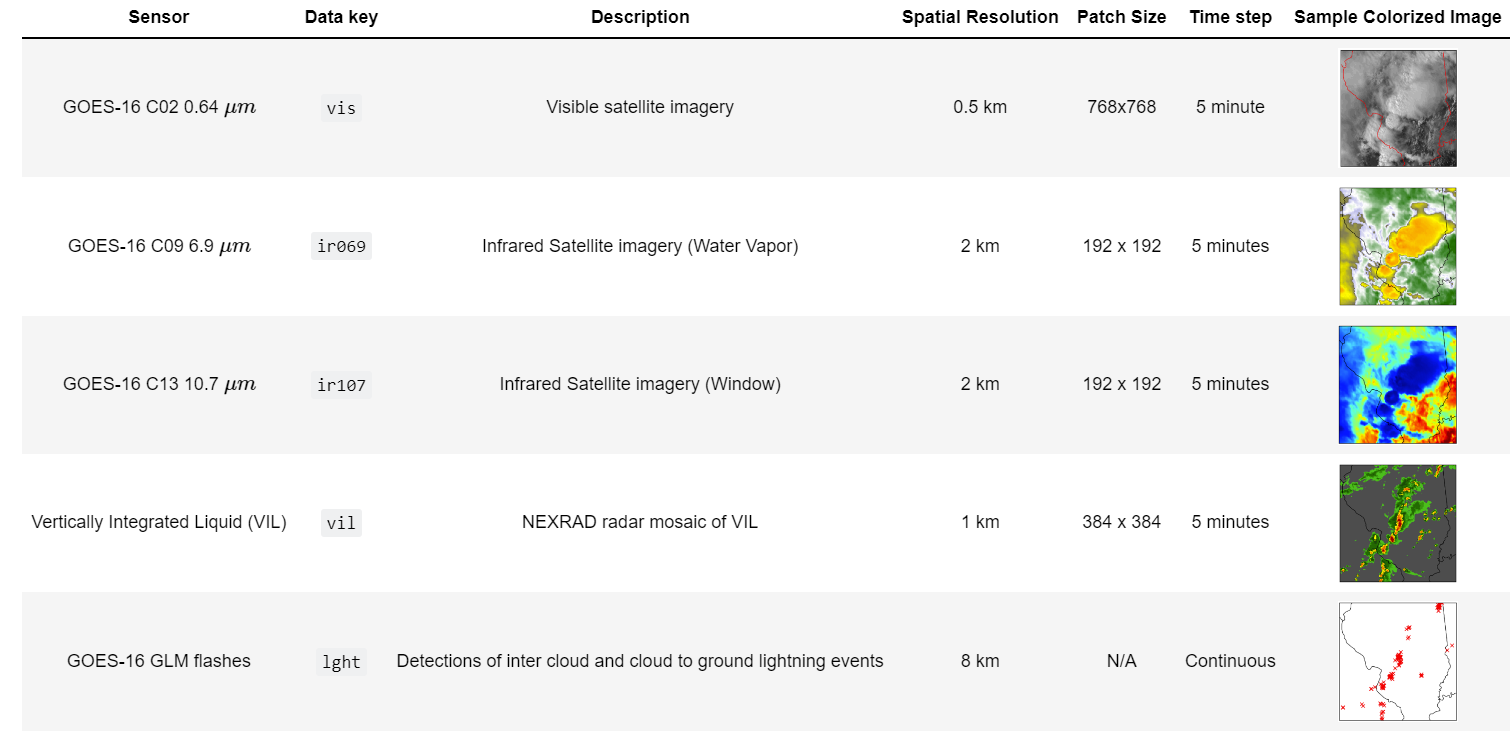

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Downloading SEVIR Data:**

SEVIR dataset consists of 5 modalities from different sensors.
We have used AWS SDK for Python (Boto3) to create, configure, and manage AWS services, such as Amazon Elastic Compute Cloud (Amazon EC2) and Amazon Simple Storage Service (Amazon S3).

In [ ]:
import boto3
from botocore.handlers import disable_signing
resource = boto3.resource('s3')
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')

In [ ]:
#Making a directory
import os
!mkdir SEVIR


mkdir: cannot create directory ‘SEVIR’: File exists


# **Dowloading SEVIR Files:**

In [ ]:
#Dowloading the catalog
bucket.download_file('CATALOG.csv','/content/SEVIR/CATALOG.csv')

In [ ]:
#Dowloading data from lght sensor:
bucket.download_file('data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5','/content/SEVIR/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5')

In [ ]:
#Dowloading data from ir069 sensor:
bucket.download_file('data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5','/content/SEVIR/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5')

In [ ]:
#Dowloading data from ir107 sensor:
bucket.download_file('data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5','/content/SEVIR/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5')

In [ ]:
#Dowloading data from vis sensor:
bucket.download_file('data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5','/content/SEVIR/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5')

In [ ]:
#Dowloading data from vil sensor:
bucket.download_file('data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5','/content/SEVIR/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5')

# **Acessing a SEVIR event:**
The following code shows how to open a data file containing a catalog and use h5py: Disk to visualize event frames captured from a single type as if they were real NumPy arrays . Access and visualize event 835047 from the vil sensor data..

Event ID: b'S835047'
Image shape: (384, 384, 49)


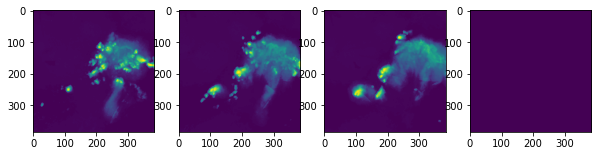

In [ ]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
 
file_index = 14
with h5py.File('/content/SEVIR/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You can use the catalog to access event data collected from multiple sensor types. Find all available sensors for each event by grouping by the ID column. Some events in SEVIR are not covered by all sensors, so we also need to filter out events that are not covered by all requested image types.

The following code shows how to extract events observed by four image types: vis, vil, ir069, and ir107. Again, we're only interested in one of the long list of events available in the CATALOG.csv file, so we filter to find the vis, vil, ir069, and ir107 images for that event.



In [ ]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv('/content/SEVIR/CATALOG.csv',parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['ir069','ir107','vil','vis'])
# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

# Grab the event 835047 and view catalog entries

sample_event=events.get_group('S835047')
print('Sample Event:','S835047')
sample_event

Found 12739 events matching {'vis', 'ir069', 'ir107', 'vil'}
Sample Event: S835047


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


In [ ]:
sample_event.head()

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


# **Visualizing SEVIR Data**
So far, only data from vis, vil, ir069, and ir107 have been recorded. To display the flashlight among other image types in the data collected in the previous results, you must first convert the flashlight to a raster type. To achieve this, the flash data is converted to flash counts per pixel per 5 minute frame with the following code.


vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5
ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5
ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5
vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5


(<matplotlib.image.AxesImage at 0x7f181b4cfb10>, Text(0.5, 1.0, 'VIL'))

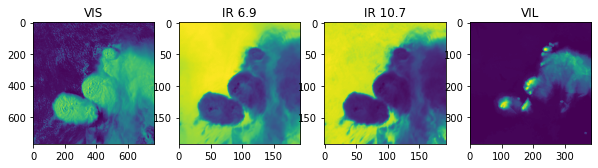

In [ ]:
def read_data( sample_event, img_type, data_path='/content/SEVIR' ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
    fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
    print(fn)
    #print(sample_event)
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

vis = read_data(sample_event, 'vis')
ir069 = read_data(sample_event, 'ir069')
ir107 = read_data(sample_event, 'ir107')
vil = read_data(sample_event, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')


(<matplotlib.image.AxesImage at 0x7f18231fa2d0>, Text(0.5, 1.0, 'Lightning'))

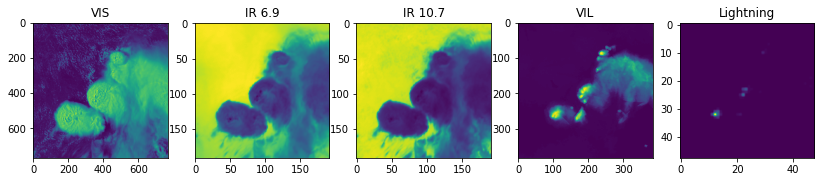

In [ ]:
import numpy as np
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

def read_lght_data( sample_event, data_path='/content/SEVIR' ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)

lght = read_lght_data(sample_event)

# include lightning counts in plot
fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx]), axs[4].set_title('Lightning')

In previous visualizations, data was displayed with a default color map. The repository at https://github.com/MIT-AI-Accelerator/eie-sevir contains color maps that can be used to display color images similar to those expected to appear in SEVIR data. I'm here. The sevir module from this repository must be in your path for this code to work. To access the included libraries, clone the repository.

In [ ]:
! git clone https://github.com/MIT-AI-Accelerator/eie-sevir.git

Cloning into 'eie-sevir'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 265 (delta 126), reused 121 (delta 52), pack-reused 45
Receiving objects: 100% (265/265), 71.04 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [ ]:
%cd eie-sevir/sevir
%pwd

/content/eie-sevir/sevir


'/content/eie-sevir/sevir'

We will now import the get_cmap function available in the display.py file.

In [ ]:
from display import get_cmap

Visulizing the five sensor images using the SEVIR specific colormap, we have the resultant images as below:

(<matplotlib.image.AxesImage at 0x7f181a312510>, Text(0.5, 1.0, 'Lightning'))

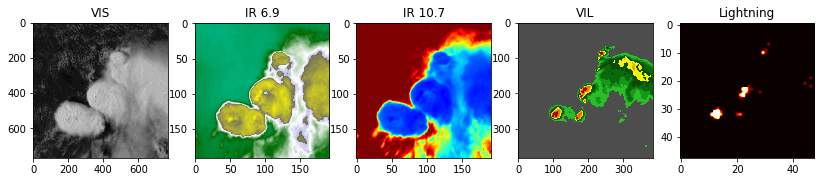

In [ ]:
import sys
sys.path.append('../') # add sevir module to path
#import get_cmap
# Get colormaps for encoded types
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
lght_cmap,lght_norm,lght_vmin,lght_vmax = get_cmap('lght',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm,vmin=vis_vmin,vmax=vis_vmax), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx],cmap=lght_cmap,norm=lght_norm,vmin=lght_vmin,vmax=lght_vmax), axs[4].set_title('Lightning')


# **Georeferencing SEVIR Events:**
In many applications it's necessary to know the lat/lon positions of pixels in a SEVIR patch. The catalog provides the required information to perform the georeferencing the data.

Currently, all patches in SEVIR use the same map projection, a Lambert Equal Area projection centered at (lat,lon)=(38,-98). This specifics of the projection are stored in the proj column:

In [ ]:
sample_event.proj.values[0]

'+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=6370997.0 +ellps=sphere '

The Proj4 syntax used in this message defines a map projection.

The projection formula for this particular instance is encoded in the following class. With this, you can change the coordinates for each event in SEVIR between pixel coordinates and latitude/longitude coordinates.

In [ ]:
import re
import numpy as np
class LaeaProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y
        
    def forward(self,lon,lat,pixel=True):
        """
        Maps lat/lon to pixel x,y.  For projection coordinates instead of pixel, set pixel=False.
        """
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        k = self.R * np.sqrt(2/(1+sind(self.lat0)*sind(lat)+cosd(self.lat0)*cosd(lat)*cosd(lon-self.lon0)))
        x = k*cosd(lat)*sind(lon-self.lon0)
        y = k*(cosd(self.lat0)*sind(lat) - sind(self.lat0)*cosd(lat)*cosd(lon-self.lon0))
        if pixel:
            x = (x-self.refX) / self.binX
            y = (y-self.refY) / self.binY
        return x,y
    def inverse(self,x,y,pixel=True):
        """
        Maps pixel coordinates to (lon,lat) position.  If passing projection corrdinates, set pixel=False.
        """
        if pixel:
            x = x*self.binX + self.refX
            y = y*self.binY + self.refY
        x/=self.R
        y/=self.R
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        rho = np.sqrt(x*x+y*y)
        c = 2*np.arcsin(0.5*rho)
        sinc = np.sin(c)
        cosc = np.cos(c)
        lat = 180/np.pi*np.arcsin(cosc*sind(self.lat0)+y*sinc*cosd(self.lat0)/rho)
        lon = self.lon0+180/np.pi*np.arctan(x*sinc/(rho*cosd(self.lat0)*cosc - y*sind(self.lat0)*sinc))
        return lon,lat
        

# **Georeferencing an event**
Using this class, we can get a grid of latitudes and longitudes for our event_id=835047.

Text(0.5, 1.0, 'Pixel Longitudes')

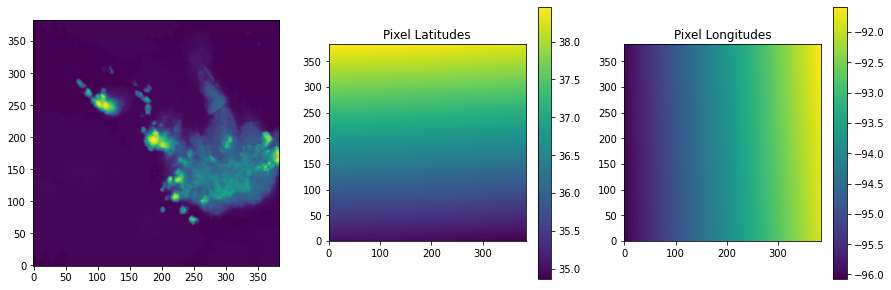

In [ ]:
proj = LaeaProjection(sample_event[sample_event.img_type=='vil'].squeeze() )
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')

This particular domain overlaps with Southwestern Missouri. We can add markers for particular locations by converting from lat/lon coordinates into the image pixel coordinates:

# **Visualizing a satellite image by are co-ordinates:**

The code below helps in representing the vil(Vertically Integrated Liquid) over Cassaville, MI, this is a sattelite image using the NEXRAD radar mosiac sensor.

Vertically integrated liquid (VIL) is an estimate of the total mass of precipitation in the clouds. The measurement is obtained by observing the reflectivity of the air which is obtained with weather radar.

x=192.107485,y=192.449596


Text(162.10748498892426, 162.4495960216667, 'Cassville, MI')

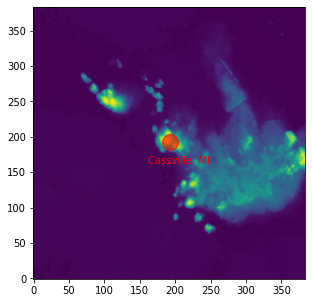

In [ ]:
lat,lon = 36.69, -93.87 # Cassville, MI
x,y=proj.forward(lon,lat)
print('x=%f,y=%f' % (x,y))
# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vil[:,:,20],origin='lower')
ax.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30,y-30,'Cassville, MI',color='r')

You can further improve the image above by adding details such as state borders. Thanks to a set of Python libraries that compute these transformations, you can display georeferenced results with features such as coastlines, state boundaries, and other attractive map features. A popular module for computing geo-transformations is pyproj. The Basemap and Cartopy plotting libraries are excellent. The cell below shows how to add state boundaries using the basemap library instead of the old georeferencing method.

In [ ]:
pip install basemap basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 8.0 MB/s 
     |████████████████████████████████| 91.1 MB 101 kB/s 
     |████████████████████████████████| 6.3 MB 64.6 MB/s 
     |████████████████████████████████| 30.5 MB 84.3 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 


Text(162107.48498892388, 162449.59602166762, 'Cassville, MI')

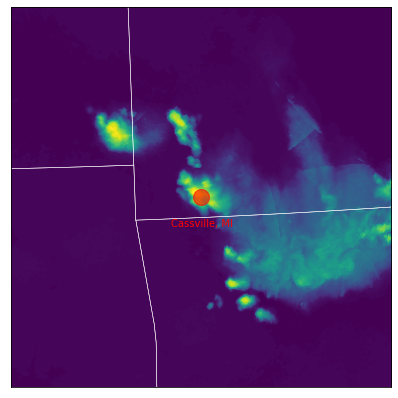

In [ ]:
# Note:  Requires basemap module to run
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap # conda/pip install basemap basemap-data-hires
# Create Basemap Object
s=sample_event[sample_event.img_type=='vil'].squeeze() 
fig,ax=plt.subplots(1,1,figsize=(7,7))
m = Basemap(llcrnrlat=s.llcrnrlat, llcrnrlon=s.llcrnrlon,
            urcrnrlat=s.urcrnrlat,urcrnrlon=s.urcrnrlon,
            width=s.width_m, height=s.height_m,
            lat_0=38, lon_0=-98,
            projection='laea',
            resolution='i',
            ax=ax)
m.drawstates(color='w')
m.drawcoastlines(color='w')
m.drawcountries(color='w')
m.imshow(vil[:,:,24])

lat,lon = 36.69, -93.87 # Cassville, MI
x,y=m(lon,lat) # will be in projection coordinates
m.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30e3,y-30e3,'Cassville, MI',color='r')


# **Conclusion**
This notebook provides detailed information on the SEVIR dataset, from how to retrieve SEVIR data from an AWS S3 bucket using boto3, to how to visualize all types of sensor data (vil, ir069, ir107, lght). I explained the research. We also used the CATALOG.csv file to georeference the SEVIR data and plot the actual event locations as Cassville, Michigan. A basemap projection was used to create a more readable representation using state boundaries.

# **References**
NOAA's Storm Event Database: https://www.ncdc.noaa.gov/stormevents/ftp.jsp
https://nbviewer.org/github/MIT-AI-Accelerator/eie-sevir/blob/master/examples/SEVIR_Tutorial.ipynb
https://github.com/MIT-AI-Accelerator/sevir_challenges
https://raw.githubusercontent.com/MIT-AI-Accelerator/eie-sevir/master/CATALOG.csv
https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/
https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf
https://sevir.mit.edu/sites/default/files/About_SEVIR.pdf
https://proceedings.neurips.cc/paper/2020/file/fa78a16157fed00d7a80515818432169-Paper.pdf